# Chuyển file xlsx thành file csv

In [ ]:
import pandas as pd

# Đọc file .xlsx
df = pd.read_excel('Car_Insurance2024.xlsx')

# Lưu file dưới định dạng .csv
df.to_csv('Car_Insurance.csv', index=False)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

# Đọc dữ liệu

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
url = 'F:\\NamTu\\HK1\\KhaiKhoangDuLieu\\Project_Nhom5_STT21\\Car_Insurance.csv'

df = pd.read_csv(url)
df.head()

,ID,Name,Work,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,...,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,N1,CTU,65+,female,majority,0-9y,high school,upper class,0.629027,...,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,750365,N2,CTU,16-25,male,majority,0-9y,none,poverty,0.357757,...,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,199901,N3,CTU,16-25,female,majority,0-9y,high school,working class,0.493146,...,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,478866,N4,CTU,16-25,male,majority,0-9y,university,working class,0.206013,...,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,731664,N5,CTU,26-39,male,majority,10-19y,none,working class,0.388366,...,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


In [11]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   Name                 10000 non-null  object 
 2   Work                 10000 non-null  object 
 3   AGE                  10000 non-null  object 
 4   SEX                  9999 non-null   object 
 5   RACE                 9998 non-null   object 
 6   DRIVING_EXPERIENCE   9998 non-null   object 
 7   EDUCATION            9998 non-null   object 
 8   INCOME               9998 non-null   object 
 9   CREDIT_SCORE         9016 non-null   float64
 10  SALARY               24 non-null     float64
 11  VEHICLE_OWNERSHIP    9998 non-null   float64
 12  VEHICLE_YEAR         9998 non-null   object 
 13  MARRIED              9999 non-null   float64
 14  CHILDREN             9999 non-null   float64
 15  POSTAL_CODE          9999 non-null   

In [12]:
print(df.isnull().sum())

ID                        0
Name                      0
Work                      0
AGE                       0
SEX                       1
RACE                      2
DRIVING_EXPERIENCE        2
EDUCATION                 2
INCOME                    2
CREDIT_SCORE            984
SALARY                 9976
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   1
CHILDREN                  1
POSTAL_CODE               1
ANNUAL_MILEAGE          958
VEHICLE_TYPE              1
SPEEDING_VIOLATIONS       1
DUIS                      0
PAST_ACCIDENTS            0
OUTCOME                   0
dtype: int64


Đếm số giá trị 0 và 1 của OUTCOME

In [13]:
counts = df['OUTCOME'].value_counts()
print("Số lượng dòng dữ liệu là 0:", counts.get(0, 0))
print("Số lượng dòng dữ liệu là 1:", counts.get(1, 0))

Số lượng dòng dữ liệu là 0: 6867
Số lượng dòng dữ liệu là 1: 3133


Các giá trị độc nhất của các cột thuộc tính

In [14]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Cột '{column}':")
    print(unique_values)
    print()

Cột 'ID':
[569520 750365 199901 ... 468409 903459 442696]

Cột 'Name':
['N1' 'N2' 'N3' ... 'N9998' 'N9999' 'N10000']

Cột 'Work':
['CTU']

Cột 'AGE':
['65+' '16-25' '26-39' '40-64']

Cột 'SEX':
['female' 'male' 'Man' 'M' 'F' nan]

Cột 'RACE':
['majority' 'minority' nan]

Cột 'DRIVING_EXPERIENCE':
['0-9y' '10-19y' '20-29y' '30y+' nan]

Cột 'EDUCATION':
['high school' 'none' 'university' nan]

Cột 'INCOME':
['upper class' 'poverty' 'working class' 'middle class' nan]

Cột 'CREDIT_SCORE':
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]

Cột 'SALARY':
[5.69520e+05 7.50365e+05 1.99901e+05 4.78866e+05 7.31664e+05 8.77557e+05
 9.30134e+05 4.61006e+05 6.83660e+04 4.45911e+05 2.75820e+05 5.21399e+05
 4.29728e+05 5.69640e+05 9.80181e+05 9.06223e+05 5.17747e+05 2.48510e+04
 1.04086e+05 2.40658e+05 4.84399e+05 9.12828e+05 8.92754e+05 2.17000e+02
         nan]

Cột 'VEHICLE_OWNERSHIP':
[ 1.  0. nan]

Cột 'VEHICLE_YEAR':
['after 2015' 'before 2015' nan]

Cột 'MARRIED':
[ 0.  

# Xử lý dữ liệu

Xử lý giá trị không đồng nhất và lắp giá trị bị thiếu cho cột SEX

In [15]:
# Thay thế giá trị trong cột 'SEX'
df['SEX'] = df['SEX'].replace({
    'Man': 'male',
    'M': 'male',
    'F': 'female'
})

# Lấp đầy giá trị NaN bằng giá trị phổ biến nhất trong cột 'SEX'
#Sử dụng fillna() kết hợp với mode() để lấp đầy giá trị NaN bằng giá trị phổ biến nhất trong cột 'SEX'.
df['SEX'] = df['SEX'].fillna(df['SEX'].mode()[0])

Xử lý giá trị bị thiếu ở cột RACE, DRIVING_EXPERIENCE, EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,VEHICLE_TYPE,SPEEDING_VIOLATIONS

In [16]:
# Lấp đầy giá trị bị thiếu cho các cột khác
columns_to_fill = ['RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_OWNERSHIP','VEHICLE_YEAR','POSTAL_CODE','VEHICLE_TYPE','SPEEDING_VIOLATIONS']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

Xử lý giá trị không hợp lệ ở cột Married và lắp đầy giá trị bị thiểu ở cột MARRIED

In [17]:
df['MARRIED'] = df['MARRIED'].replace(11, 1)
df['MARRIED'] = df['MARRIED'].fillna(df['MARRIED'].mode()[0])

Xử lí cột children

In [18]:
df['CHILDREN'] = df['CHILDREN'].replace(1000, 1)
df['CHILDREN'] = df['CHILDREN'].fillna(df['CHILDREN'].mode()[0])

Xóa cột ID, Name, Work

In [19]:
df.drop(columns=['ID', 'Name', 'Work'], inplace=True)

Tính trung vị (median) của cột CREDIT_SCORE

In [20]:
upper_class_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
middle_class_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
poverty_class_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
working_class_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

Xử lý dữ liệu bị thiếu ở CREDIT_SCORE

In [21]:
df.loc[(df[(df['INCOME'] == 'working class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].fillna(working_class_median)
df.loc[(df[(df['INCOME'] == 'poverty') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].fillna(poverty_class_median)
df.loc[(df[(df['INCOME'] == 'middle class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].fillna(middle_class_median)
df.loc[(df[(df['INCOME'] == 'upper class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].fillna(upper_class_median)

Xử lý dữ liệu bị thiếu ở cột ANNUAL_MILEAGE

In [22]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

Xóa cột có chứa giá trị null ở cột Salary

In [23]:
df.dropna(axis=1,inplace=True)

Xóa dòng trùng lặp

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9985 non-null   object 
 1   SEX                  9985 non-null   object 
 2   RACE                 9985 non-null   object 
 3   DRIVING_EXPERIENCE   9985 non-null   object 
 4   EDUCATION            9985 non-null   object 
 5   INCOME               9985 non-null   object 
 6   CREDIT_SCORE         9985 non-null   float64
 7   VEHICLE_OWNERSHIP    9985 non-null   float64
 8   VEHICLE_YEAR         9985 non-null   object 
 9   MARRIED              9985 non-null   float64
 10  CHILDREN             9985 non-null   float64
 11  POSTAL_CODE          9985 non-null   float64
 12  ANNUAL_MILEAGE       9985 non-null   float64
 13  VEHICLE_TYPE         9985 non-null   object 
 14  SPEEDING_VIOLATIONS  9985 non-null   float64
 15  DUIS                 9985 non-null   int64 

In [26]:
df.to_csv('Car_Insurance_DaXuLy.csv', index=False)  # 'ten_file.csv' là tên file bạn muốn lưu

# Load tập dữ liệu vừa đã xử lý

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

url = 'F:\\NamTu\\HK1\\KhaiKhoangDuLieu\\Project_Nhom5_STT21\\Car_Insurance_DaXuLy.csv'

df = pd.read_csv(url)
df.head()

,AGE,SEX,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238.0,12000.0,sedan,0.0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238.0,16000.0,sedan,0.0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238.0,11000.0,sedan,0.0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765.0,11000.0,sedan,0.0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2.0,0,1,1


Thống kê giá trị của các cột của tập dữ liệu sau khi tiền xử lí

In [28]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Cột '{column}':")
    print(unique_values)
    print()

Cột 'AGE':
['65+' '16-25' '26-39' '40-64']

Cột 'SEX':
['female' 'male']

Cột 'RACE':
['majority' 'minority']

Cột 'DRIVING_EXPERIENCE':
['0-9y' '10-19y' '20-29y' '30y+']

Cột 'EDUCATION':
['high school' 'none' 'university']

Cột 'INCOME':
['upper class' 'poverty' 'working class' 'middle class']

Cột 'CREDIT_SCORE':
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]

Cột 'VEHICLE_OWNERSHIP':
[1. 0.]

Cột 'VEHICLE_YEAR':
['after 2015' 'before 2015']

Cột 'MARRIED':
[0. 1.]

Cột 'CHILDREN':
[1. 0.]

Cột 'POSTAL_CODE':
[10238. 32765. 92101. 21217.]

Cột 'ANNUAL_MILEAGE':
[12000. 16000. 11000. 13000. 14000. 10000.  8000. 18000. 17000.  7000.
 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000. 21000.
 22000.]

Cột 'VEHICLE_TYPE':
['sedan' 'sports car']

Cột 'SPEEDING_VIOLATIONS':
[ 0.  2.  3.  7.  6.  4. 10. 13.  1.  5.  9.  8. 12. 11. 15. 17. 19. 18.
 16. 14. 22.]

Cột 'DUIS':
[0 2 1 3 4 5 6]

Cột 'PAST_ACCIDENTS':
[ 0  1  3  7  2  5  4  6  8 10 11  9 12 14

Biểu đồ hình tròn của Age

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_3952\3403450938.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_3952\3403450938.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(0, 0, color=color, label=f'Tuổi {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)


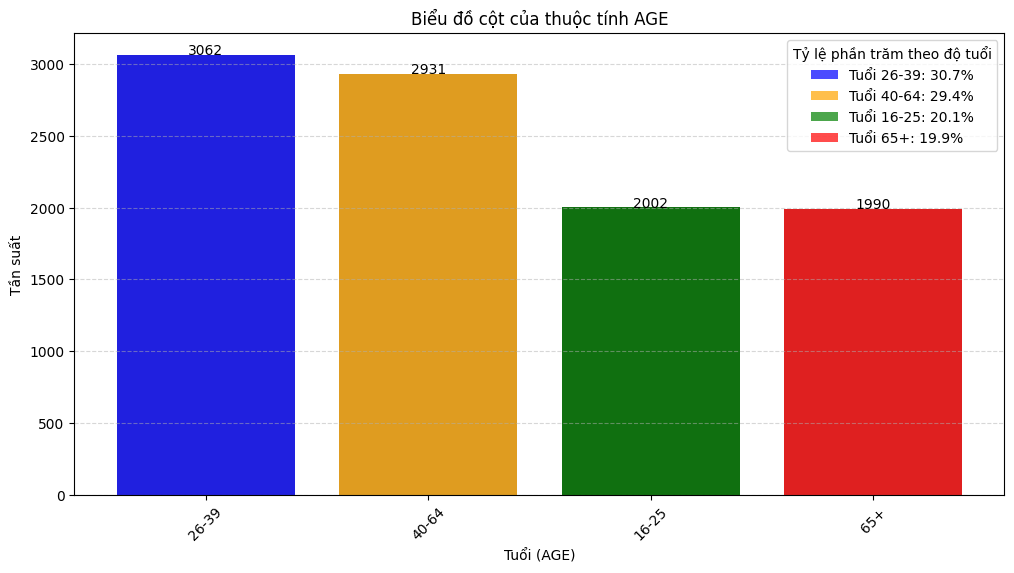

In [29]:
# Tính toán tần suất của mỗi tuổi và tỷ lệ phần trăm
age_counts = df['AGE'].value_counts().sort_values(ascending=False)
age_percentages = age_counts / age_counts.sum() * 100

# Vẽ biểu đồ cột cho thuộc tính AGE
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red']  # Các màu sắc theo thứ tự
bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)

# Thêm số lượng vào biểu đồ
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 1, str(v), ha='center')  # Hiển thị số lượng thay vì tỷ lệ phần trăm

plt.title('Biểu đồ cột của thuộc tính AGE')
plt.xlabel('Tuổi (AGE)')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm lưới cho trục y với nét gạch đứt và mờ
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Thay đổi linestyle và alpha

# Thêm ghi chú cho góc bên phải ở trên
# Tạo một chú giải (legend) cho tỷ lệ phần trăm
for i, color in enumerate(colors):
    plt.bar(0, 0, color=color, label=f'Tuổi {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)

plt.legend(title='Tỷ lệ phần trăm theo độ tuổi', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

Biểu đồ phân phối của SEX

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\1797017884.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autotext.set_text(f'{sex_counts.index[i]}: {sex_counts[i]} ({sex_counts[i]/sex_counts.sum()*100:.1f}%)')


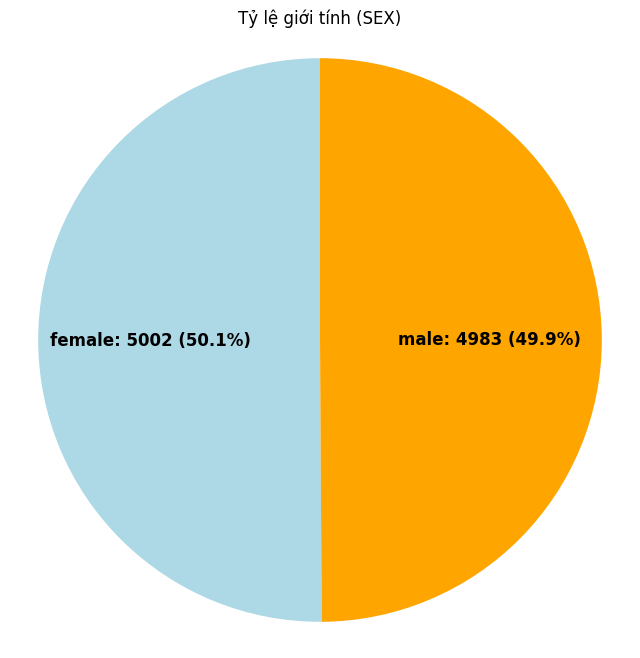

In [64]:
# Tính toán tần suất cho cột SEX
sex_counts = df['SEX'].value_counts()

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange']  # Đặt màu sắc cho các wedge
wedges, texts, autotexts = plt.pie(sex_counts, autopct='', startangle=90, colors=colors)

# Hiển thị tỷ lệ phần trăm bên trong hình tròn
for i, autotext in enumerate(autotexts):
    autotext.set_size(12)
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_text(f'{sex_counts.index[i]}: {sex_counts[i]} ({sex_counts[i]/sex_counts.sum()*100:.1f}%)')

# Thêm tiêu đề
plt.title('Tỷ lệ giới tính (SEX)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ phân phối của RACE

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\4169817067.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autotext.set_text(f'{sex_counts.index[i]}: {sex_counts[i]} ({sex_counts[i]/sex_counts.sum()*100:.1f}%)')


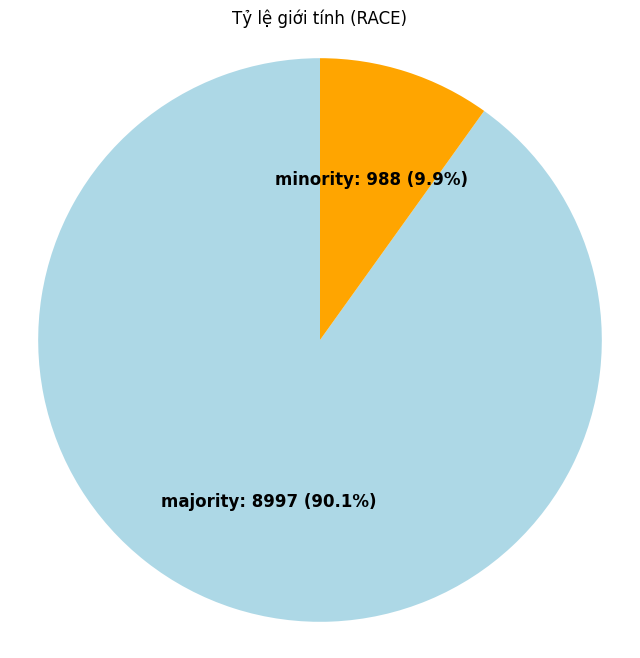

In [65]:
# Tính toán tần suất cho cột SEX
sex_counts = df['RACE'].value_counts()

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange']  # Đặt màu sắc cho các wedge
wedges, texts, autotexts = plt.pie(sex_counts, autopct='', startangle=90, colors=colors)

# Hiển thị tỷ lệ phần trăm bên trong hình tròn
for i, autotext in enumerate(autotexts):
    autotext.set_size(12)
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_text(f'{sex_counts.index[i]}: {sex_counts[i]} ({sex_counts[i]/sex_counts.sum()*100:.1f}%)')

# Thêm tiêu đề
plt.title('Tỷ lệ giới tính (RACE)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ phân phối của DRIVING_EXPERIENCE

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\71714984.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\71714984.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(0, 0, color=color, label=f'Kinh nghiệm lái xe {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)


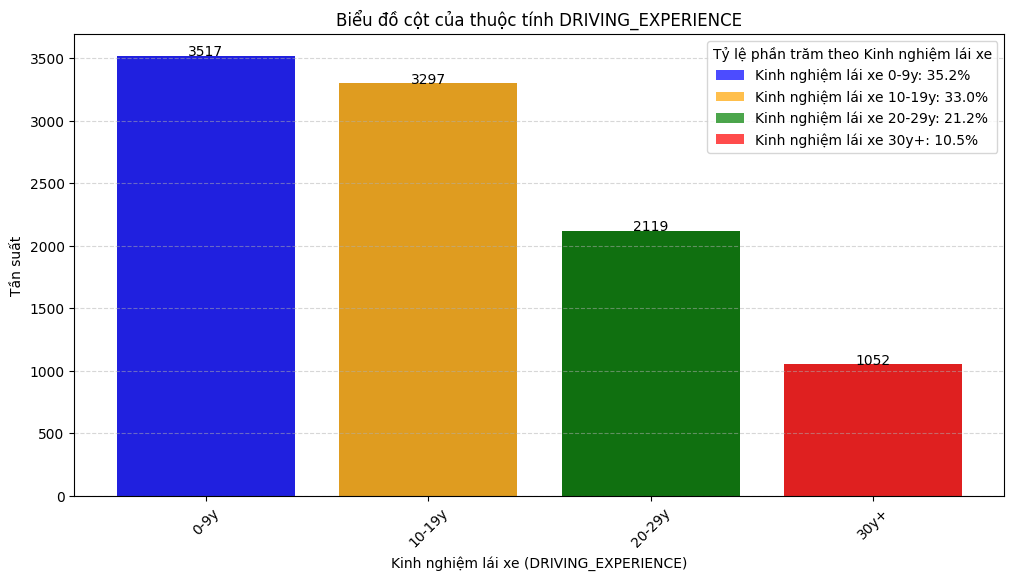

In [68]:
# Tính toán tần suất của mỗi tuổi và tỷ lệ phần trăm
age_counts = df['DRIVING_EXPERIENCE'].value_counts().sort_values(ascending=False)
age_percentages = age_counts / age_counts.sum() * 100

# Vẽ biểu đồ cột cho thuộc tính AGE
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red']  # Các màu sắc theo thứ tự
bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)

# Thêm số lượng vào biểu đồ
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 1, str(v), ha='center')  # Hiển thị số lượng thay vì tỷ lệ phần trăm

plt.title('Biểu đồ cột của thuộc tính DRIVING_EXPERIENCE')
plt.xlabel('Kinh nghiệm lái xe (DRIVING_EXPERIENCE)')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm lưới cho trục y với nét gạch đứt và mờ
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Thay đổi linestyle và alpha

# Thêm ghi chú cho góc bên phải ở trên
# Tạo một chú giải (legend) cho tỷ lệ phần trăm
for i, color in enumerate(colors):
    plt.bar(0, 0, color=color, label=f'Kinh nghiệm lái xe {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)

plt.legend(title='Tỷ lệ phần trăm theo Kinh nghiệm lái xe', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

Biểu đồ phân phối của EDUCATION

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\3811487724.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x, y, f'{education_counts.index[i]}: {education_counts[i]}',
C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\3811487724.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_texts = [f'{education_counts[i]/total*100:.1f}%' for i in range(len(education_counts))]


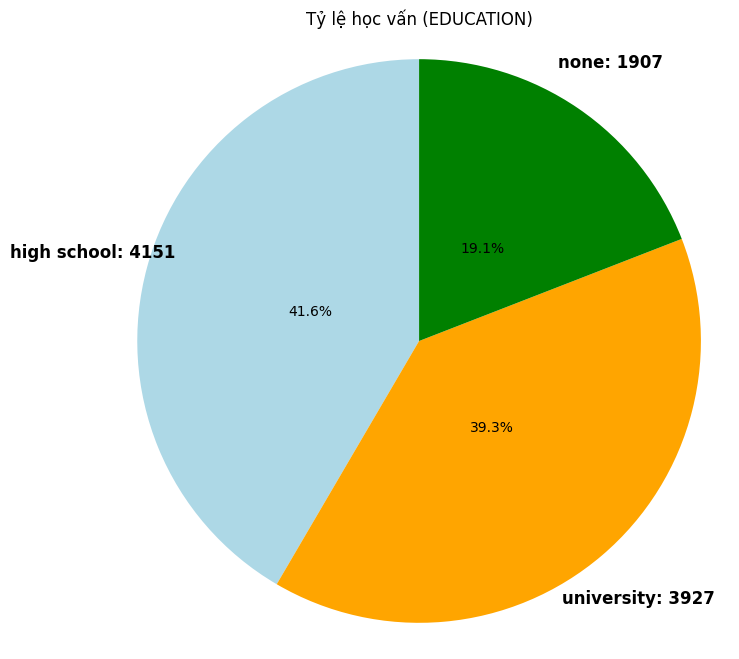

In [86]:
# Tính toán tần suất cho cột EDUCATION
education_counts = df['EDUCATION'].value_counts()

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'green']  # Đặt màu sắc cho các wedge
wedges, texts, autotexts = plt.pie(education_counts, autopct='', startangle=90, colors=colors)

# Hiển thị số lượng bên ngoài hình tròn
for i, wedge in enumerate(wedges):
    angle = wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2  # Tính góc giữa của wedge
    x = (1.2 * wedge.r) * np.cos(np.deg2rad(angle))  # Tính tọa độ x, điều chỉnh khoảng cách
    y = (1.2 * wedge.r) * np.sin(np.deg2rad(angle))  # Tính tọa độ y, điều chỉnh khoảng cách
    plt.text(x, y, f'{education_counts.index[i]}: {education_counts[i]}', 
             ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Hiển thị tỷ lệ phần trăm bên trong hình tròn
total = education_counts.sum()
percent_texts = [f'{education_counts[i]/total*100:.1f}%' for i in range(len(education_counts))]
for i, percent_text in enumerate(percent_texts):
    angle = wedges[i].theta1 + (wedges[i].theta2 - wedges[i].theta1) / 2
    x = (0.4 * wedges[i].r) * np.cos(np.deg2rad(angle))  # Đặt vào giữa wedge
    y = (0.4 * wedges[i].r) * np.sin(np.deg2rad(angle))
    plt.text(x, y, percent_text, ha='center', va='center', fontsize=10, color='black')

# Thêm tiêu đề
plt.title('Tỷ lệ học vấn (EDUCATION)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ phân phối cột INCOME

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\1556011237.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\1556011237.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(0, 0, color=color, label=f'Thu nhập {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)


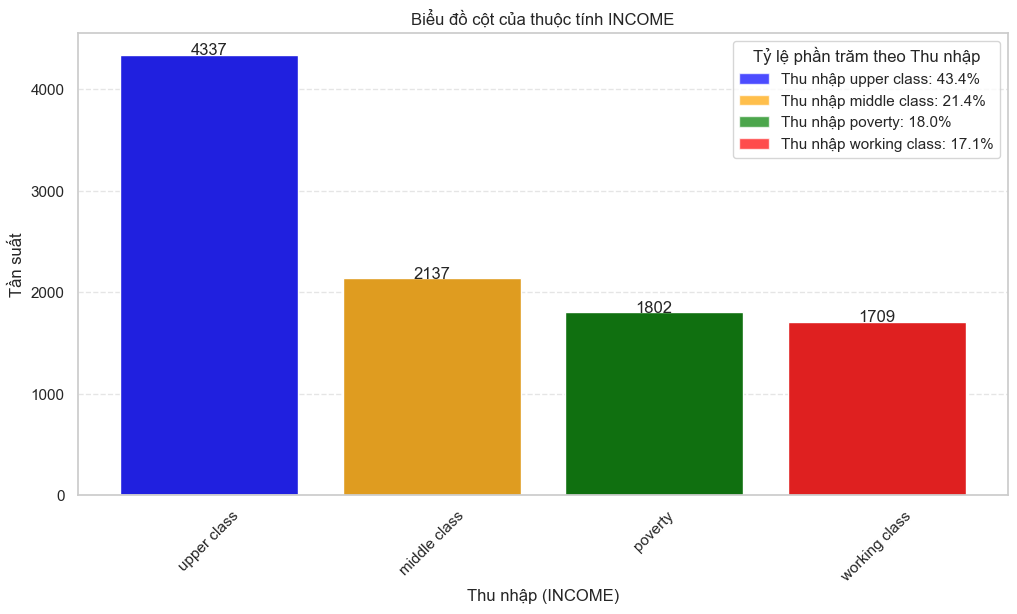

In [143]:
# Tính toán tần suất của mỗi tuổi và tỷ lệ phần trăm
age_counts = df['INCOME'].value_counts().sort_values(ascending=False)
age_percentages = age_counts / age_counts.sum() * 100

# Vẽ biểu đồ cột cho thuộc tính AGE
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red']  # Các màu sắc theo thứ tự
bar_plot = sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)

# Thêm số lượng vào biểu đồ
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 1, str(v), ha='center')  # Hiển thị số lượng thay vì tỷ lệ phần trăm

plt.title('Biểu đồ cột của thuộc tính INCOME')
plt.xlabel('Thu nhập (INCOME)')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm lưới cho trục y với nét gạch đứt và mờ
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Thay đổi linestyle và alpha

# Thêm ghi chú cho góc bên phải ở trên
# Tạo một chú giải (legend) cho tỷ lệ phần trăm
for i, color in enumerate(colors):
    plt.bar(0, 0, color=color, label=f'Thu nhập {age_counts.index[i]}: {age_percentages[i]:.1f}%', alpha=0.7)

plt.legend(title='Tỷ lệ phần trăm theo Thu nhập', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

Biểu đồ cột CREDIT SCORE

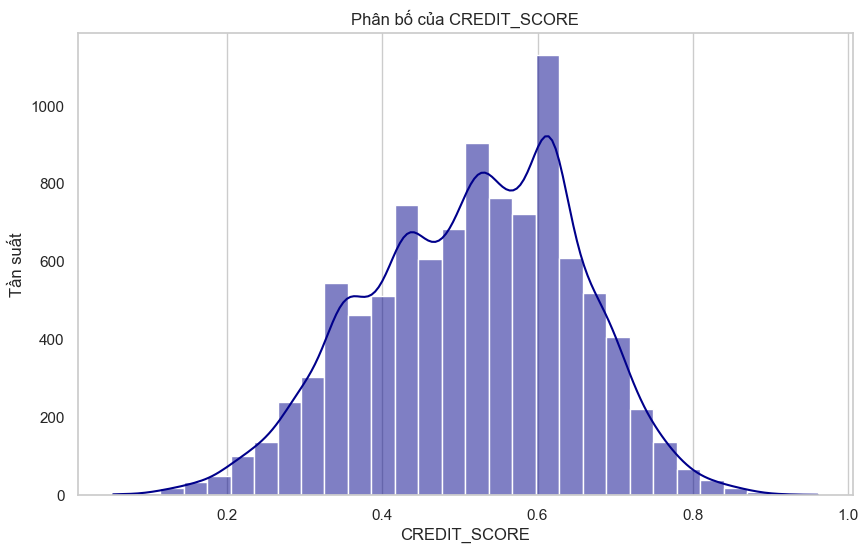

In [94]:
# Thiết lập kiểu dáng cho seaborn
sns.set(style="whitegrid")

# Vẽ histogram để hiển thị phân bố của CREDIT_SCORE
plt.figure(figsize=(10, 6))
sns.histplot(df['CREDIT_SCORE'], bins=30, kde=True, color='darkblue')
plt.title('Phân bố của CREDIT_SCORE')
plt.xlabel('CREDIT_SCORE')
plt.ylabel('Tần suất')
plt.grid(axis='y')
plt.show()

Biểu đồ phân bố của cột VEHICLE_OWNERSHIP

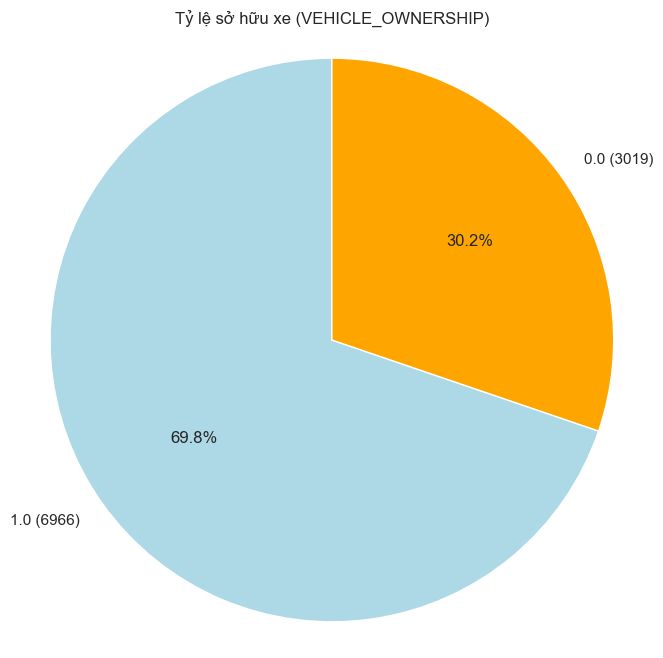

In [122]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['VEHICLE_OWNERSHIP'].value_counts()
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ sở hữu xe (VEHICLE_OWNERSHIP)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ phân phối của VIHICLE_YEAR

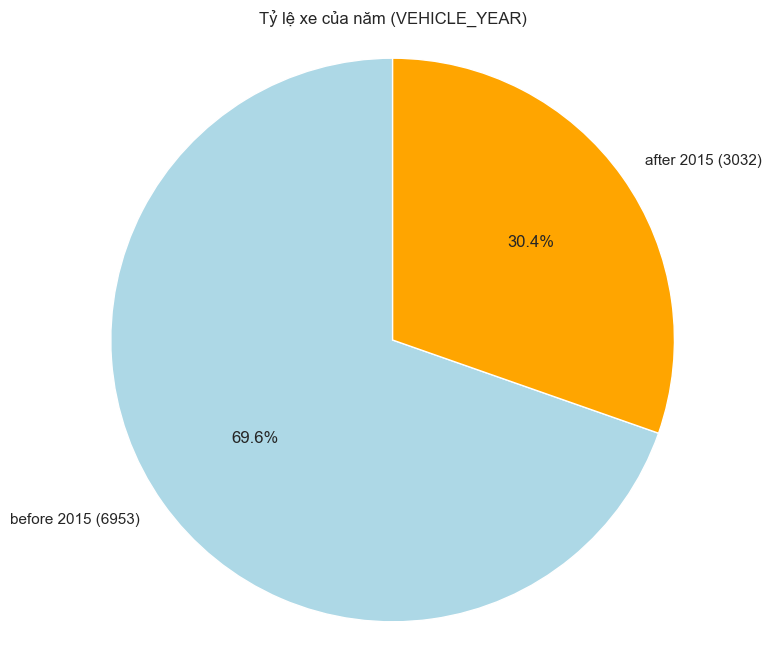

In [124]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['VEHICLE_YEAR'].value_counts()  # Sửa tên cột ở đây
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'lightgreen', 'salmon']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ xe của năm (VEHICLE_YEAR)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()


Biểu đồ cột thuộc tính MARRIED

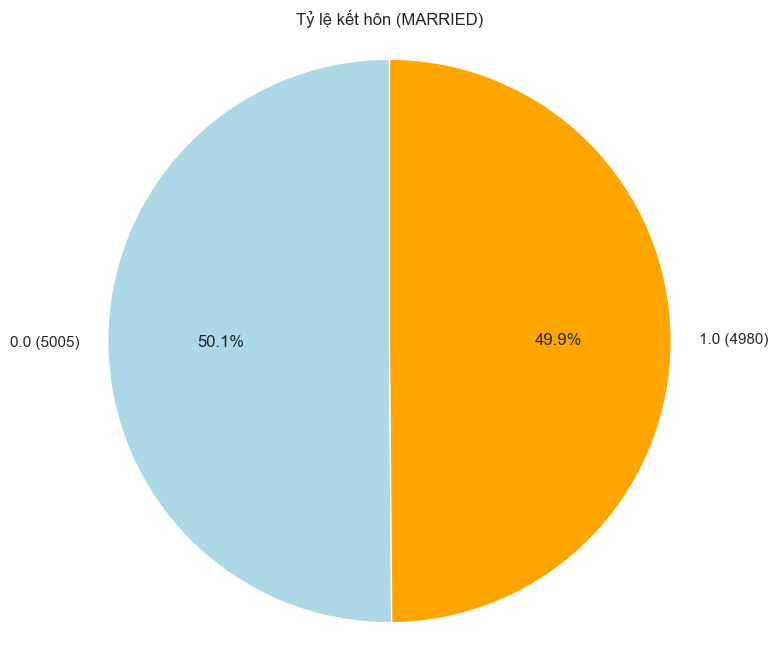

In [125]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['MARRIED'].value_counts()  # Sửa tên cột ở đây
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'lightgreen', 'salmon']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ kết hôn (MARRIED)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ phân phối cột CHILDREN

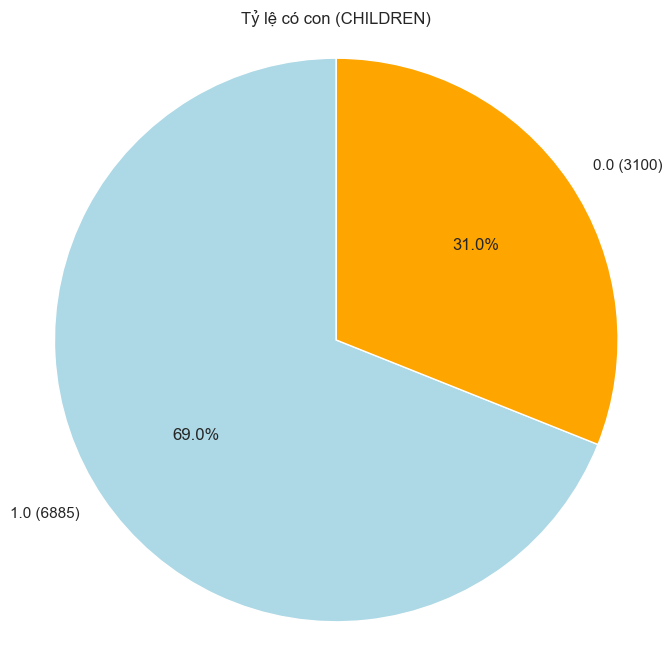

In [127]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['CHILDREN'].value_counts()  # Sửa tên cột ở đây
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'lightgreen', 'salmon']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ có con (CHILDREN)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ cột thuộc tính POSTAL_CODE

C:\Users\THANH DAT\AppData\Local\Temp\ipykernel_7080\368119689.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='POSTAL_CODE', y='FREQUENCY', data=bar_data, palette=colors)


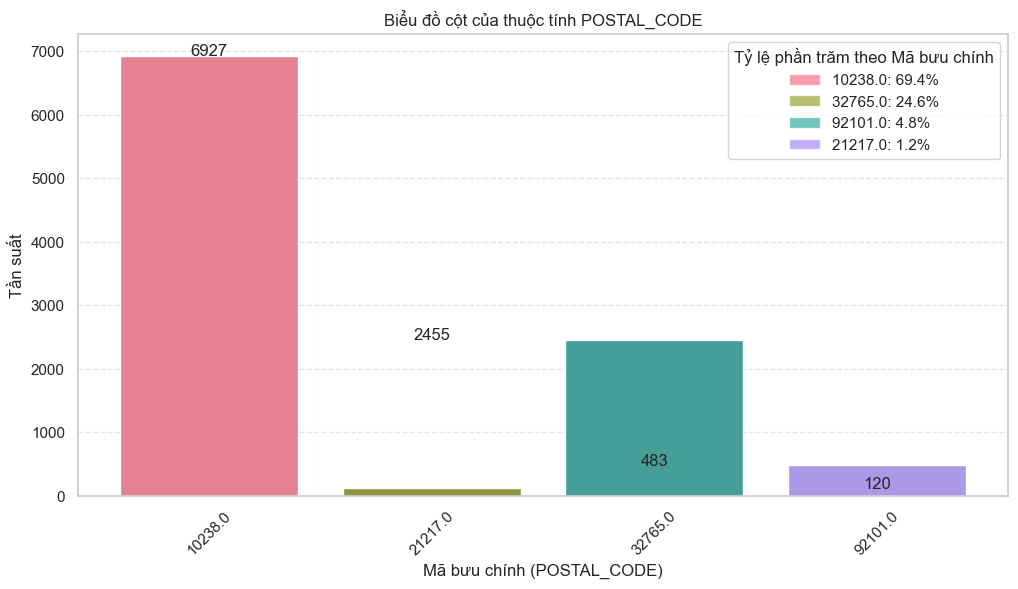

In [145]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
age_counts = df['POSTAL_CODE'].value_counts().sort_values(ascending=False)
age_percentages = (age_counts / age_counts.sum() * 100).round(1)  # Tính tỷ lệ phần trăm và làm tròn

# Vẽ biểu đồ cột cho thuộc tính POSTAL_CODE
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(age_counts))  # Tạo màu sắc cho từng cột

# Tạo một DataFrame từ age_counts để có thể sử dụng hue
bar_data = pd.DataFrame({'POSTAL_CODE': age_counts.index, 'FREQUENCY': age_counts.values})

# Tạo biểu đồ cột với chỉ số đã sắp xếp
bar_plot = sns.barplot(x='POSTAL_CODE', y='FREQUENCY', data=bar_data, palette=colors)

# Thêm số lượng vào biểu đồ
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 1, str(v), ha='center')  # Hiển thị số lượng thay vì tỷ lệ phần trăm

plt.title('Biểu đồ cột của thuộc tính POSTAL_CODE')
plt.xlabel('Mã bưu chính (POSTAL_CODE)')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm lưới cho trục y với nét gạch đứt và mờ
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Thay đổi linestyle và alpha

# Tạo một chú giải (legend) cho tỷ lệ phần trăm
# Sử dụng zip để lặp qua age_counts.index và age_percentages.values
for postal_code, percentage, color in zip(age_counts.index, age_percentages, colors):
    plt.bar(0, 0, color=color, label=f'{postal_code}: {percentage:.1f}%', alpha=0.7)

plt.legend(title='Tỷ lệ phần trăm theo Mã bưu chính', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()



Biểu đồ cột thuộc tính ANNUAL_MILEAGE

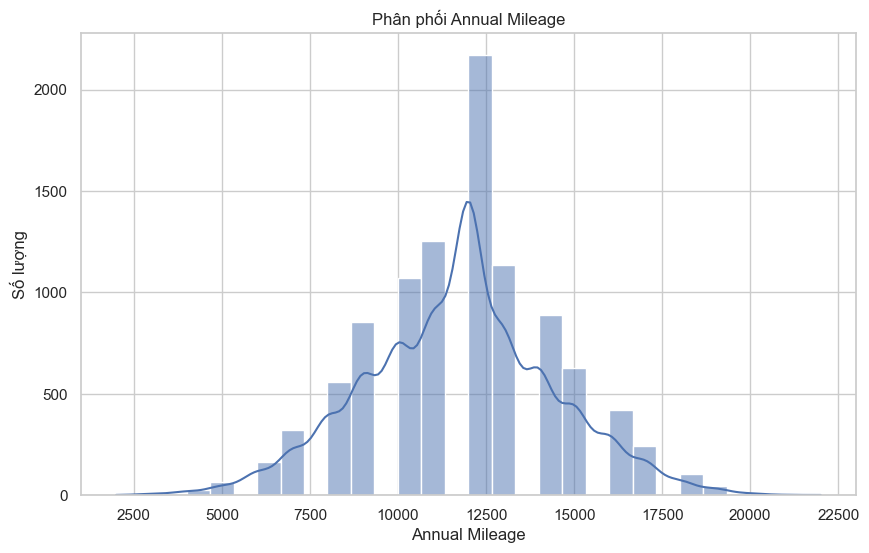

In [146]:
# Vẽ biểu đồ histogram cho cột ANNUAL_MILEAGE
plt.figure(figsize=(10, 6))
sns.histplot(df['ANNUAL_MILEAGE'], bins=30, kde=True)
plt.title('Phân phối Annual Mileage')
plt.xlabel('Annual Mileage')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


Biểu đồ cột VEHICLE_TYPE

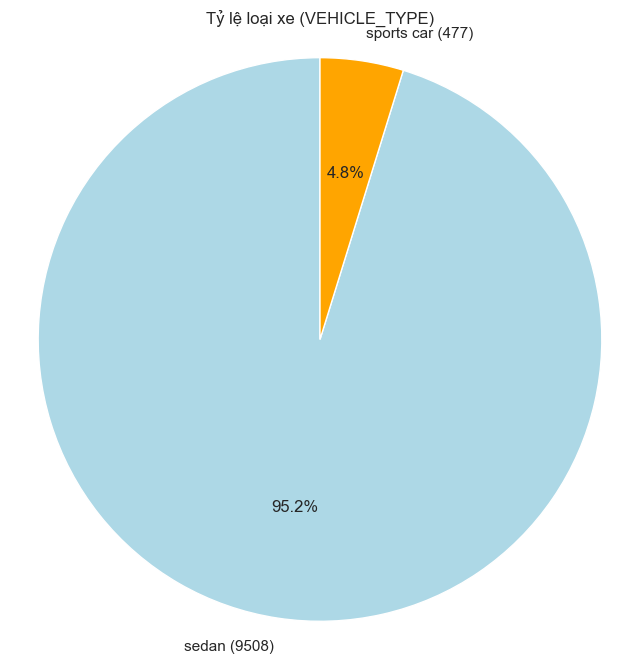

In [147]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['VEHICLE_TYPE'].value_counts()  # Sửa tên cột ở đây
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'lightgreen', 'salmon']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ loại xe (VEHICLE_TYPE)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ cột SPEEDING_VIOLATIONS

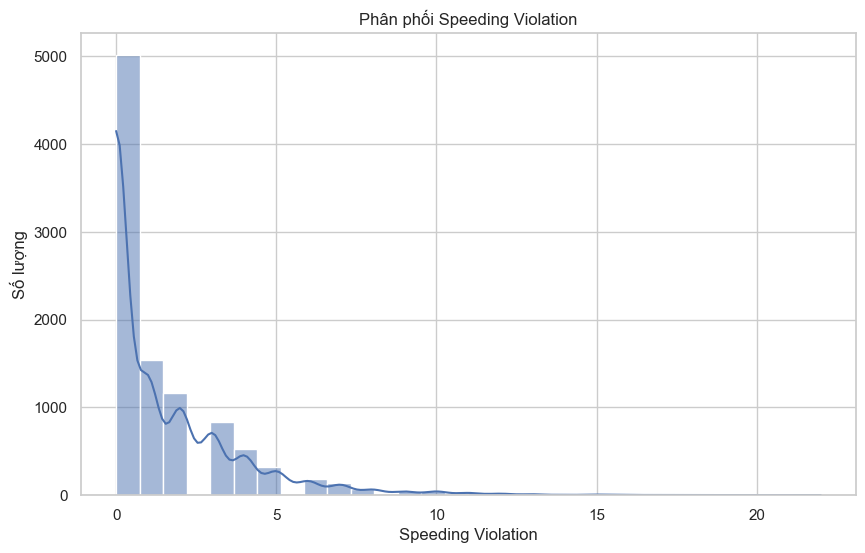

In [148]:
# Vẽ biểu đồ histogram cho cột ANNUAL_MILEAGE
plt.figure(figsize=(10, 6))
sns.histplot(df['SPEEDING_VIOLATIONS'], bins=30, kde=True)
plt.title('Phân phối Speeding Violation')
plt.xlabel('Speeding Violation')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


Biểu đồ DUIS

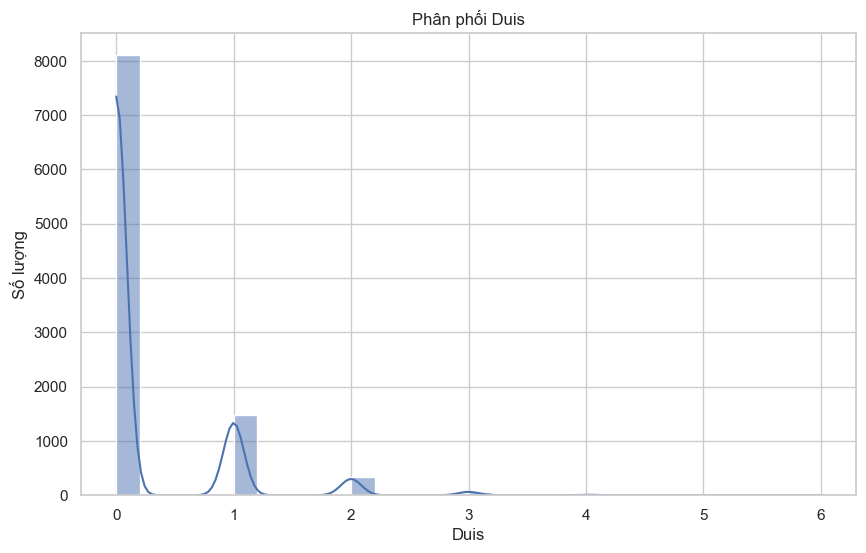

In [149]:
# Vẽ biểu đồ histogram cho cột ANNUAL_MILEAGE
plt.figure(figsize=(10, 6))
sns.histplot(df['DUIS'], bins=30, kde=True)
plt.title('Phân phối Duis')
plt.xlabel('Duis')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


Biểu đồ của PAST_ACCIDENTS

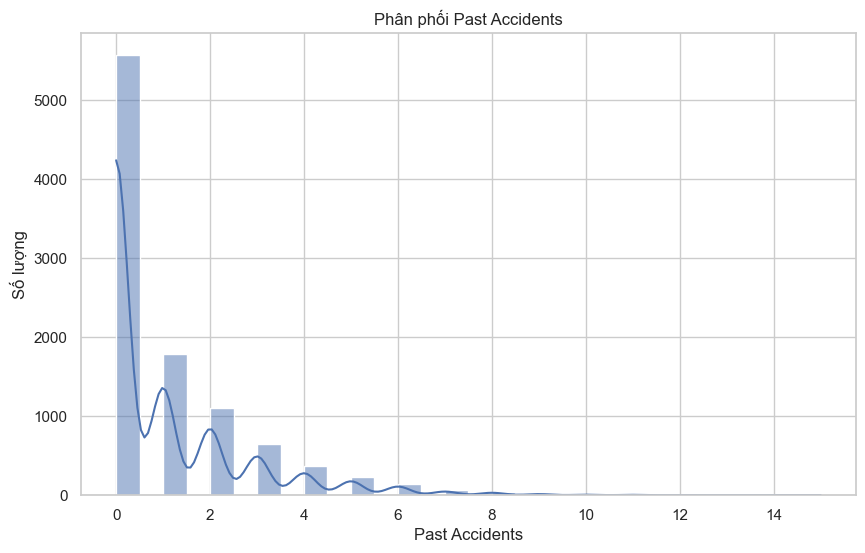

In [151]:
# Vẽ biểu đồ histogram cho cột ANNUAL_MILEAGE
plt.figure(figsize=(10, 6))
sns.histplot(df['PAST_ACCIDENTS'], bins=30, kde=True)
plt.title('Phân phối Past Accidents')
plt.xlabel('Past Accidents')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

Biểu đồ cột OUTCOME

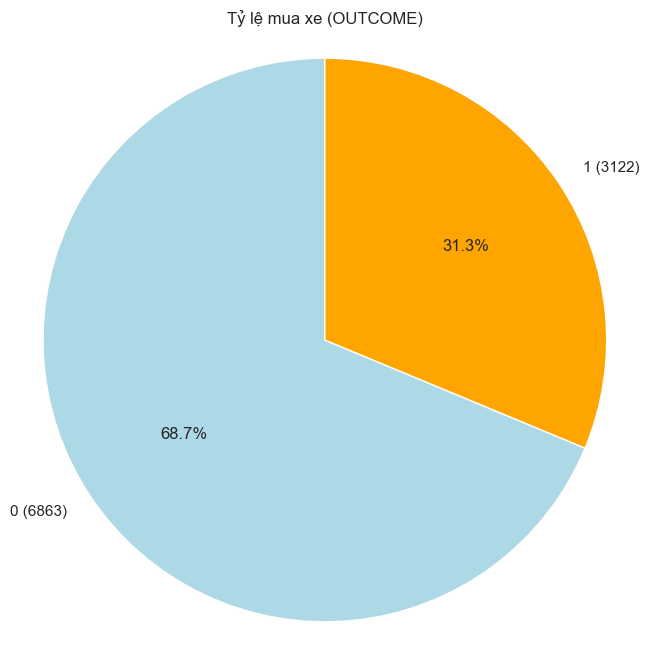

In [152]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
vehicle_ownership_counts = df['OUTCOME'].value_counts()  # Sửa tên cột ở đây
percentages = vehicle_ownership_counts / vehicle_ownership_counts.sum() * 100

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'orange', 'lightgreen', 'salmon']  # Đặt màu sắc cho các wedge

# Tạo label với cả tên và giá trị
labels = [f'{label} ({count})' for label, count in zip(vehicle_ownership_counts.index, vehicle_ownership_counts)]

# Vẽ biểu đồ hình tròn với label và giá trị
wedges, texts, autotexts = plt.pie(vehicle_ownership_counts, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels)

# Thêm tiêu đề
plt.title('Tỷ lệ mua xe (OUTCOME)')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

Biểu đồ tương quan giữa thuộc tính 

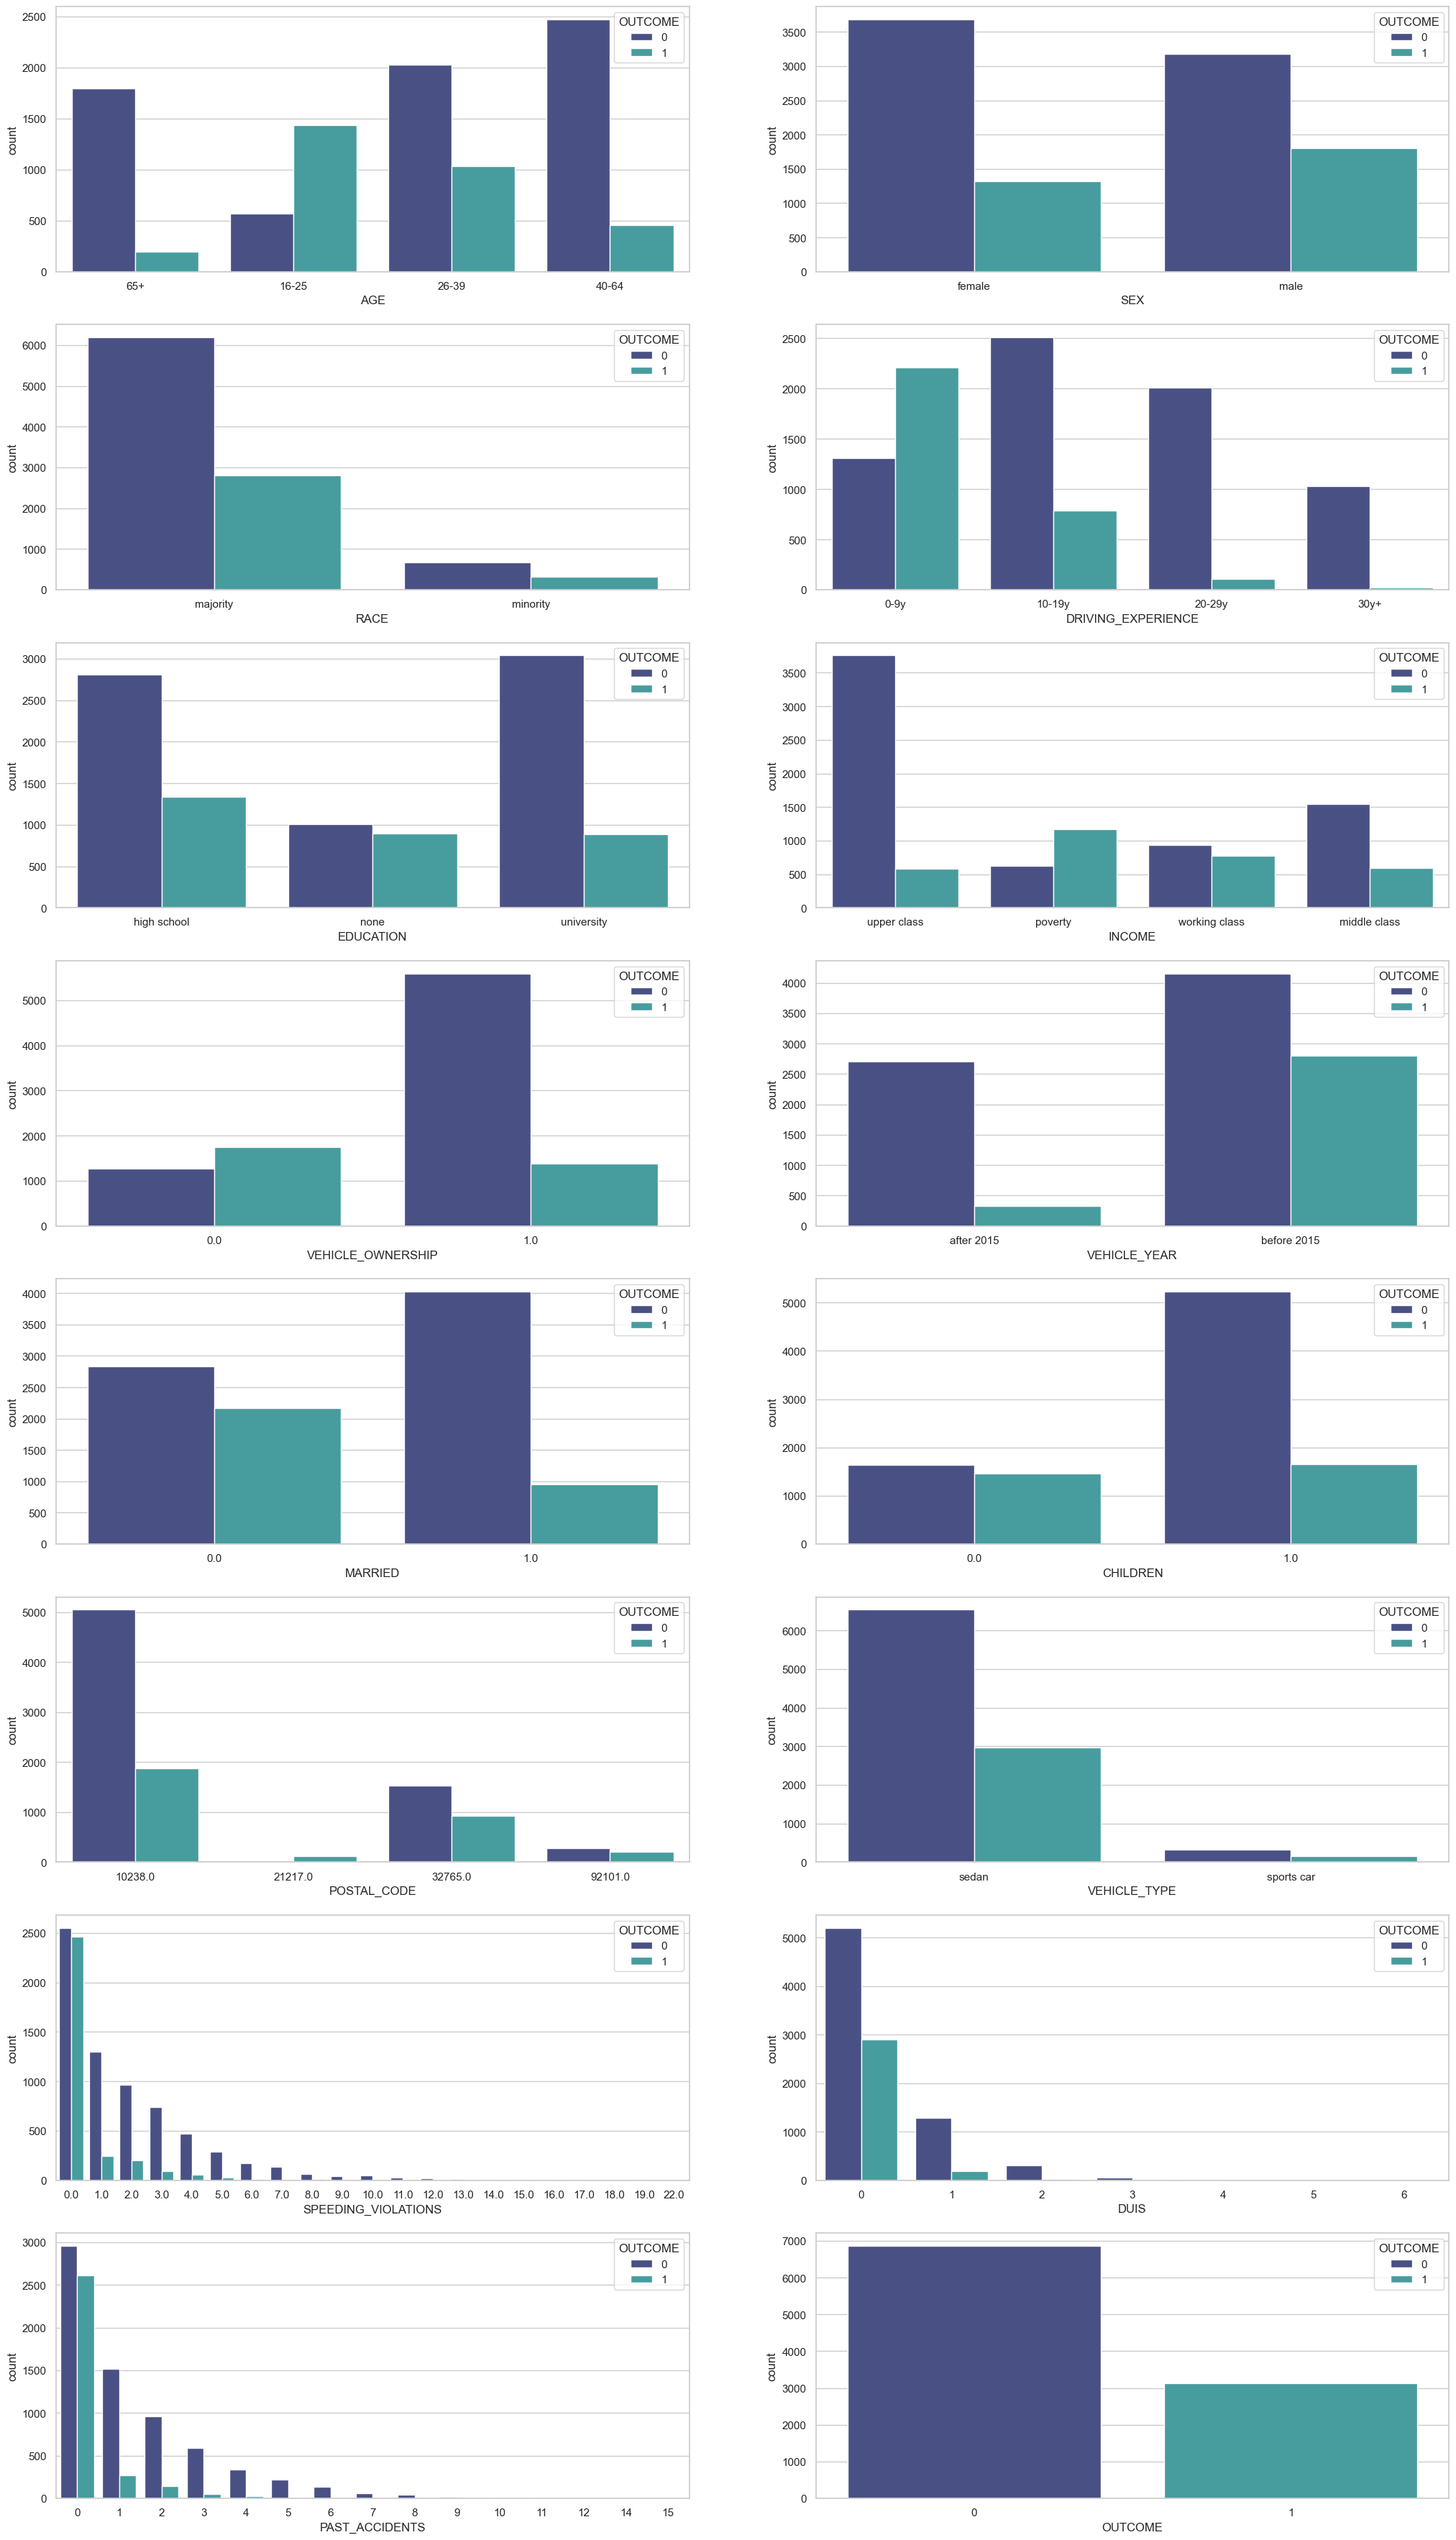

In [153]:
fig, ax = plt.subplots(8, 2, figsize=(25, 45))

features = [
    ['AGE', 'SEX'],
    ['RACE', 'DRIVING_EXPERIENCE'],
    ['EDUCATION', 'INCOME'],
    ['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'],
    ['MARRIED', 'CHILDREN'],
    ['POSTAL_CODE', 'VEHICLE_TYPE'],
    ['SPEEDING_VIOLATIONS', 'DUIS'],
    ['PAST_ACCIDENTS', 'OUTCOME']
    ]

for i in range(8):
    for j in range(2):
        try:
            col = features[i][j]
            sns.countplot(data=df, x=col, ax=ax[i][j], hue='OUTCOME', palette='mako')
        except:
            pass

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='count'>

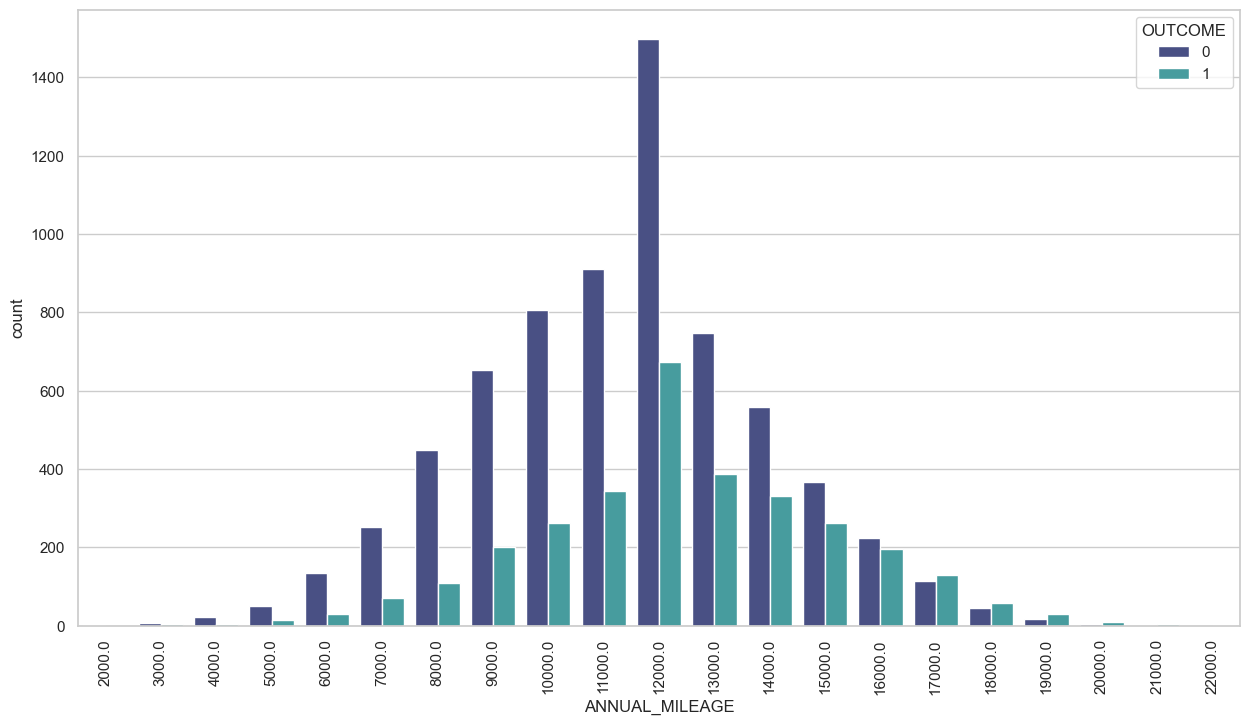

In [154]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.countplot(data=df, x='ANNUAL_MILEAGE', hue='OUTCOME', palette='mako')

<Axes: xlabel='CREDIT_SCORE', ylabel='Density'>

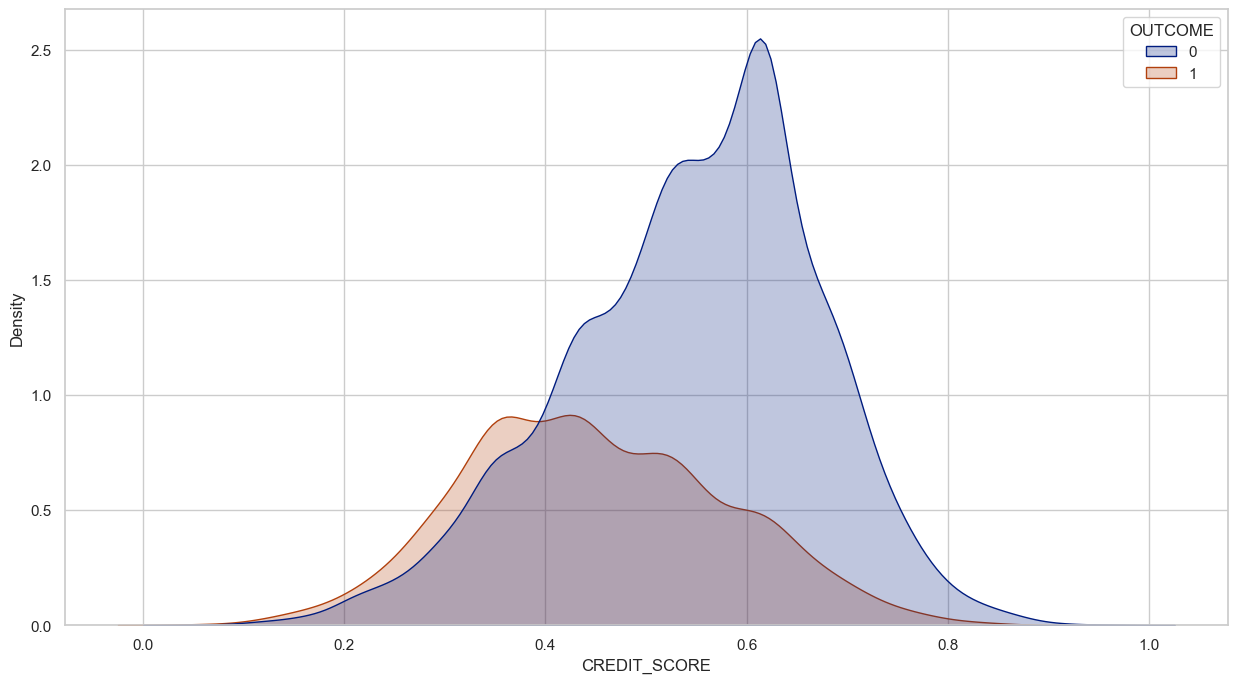

In [155]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=df, x='CREDIT_SCORE', hue='OUTCOME', palette='dark', fill=True)

Biểu đồ thể hiển tần suất xuất hiện của các giá trị

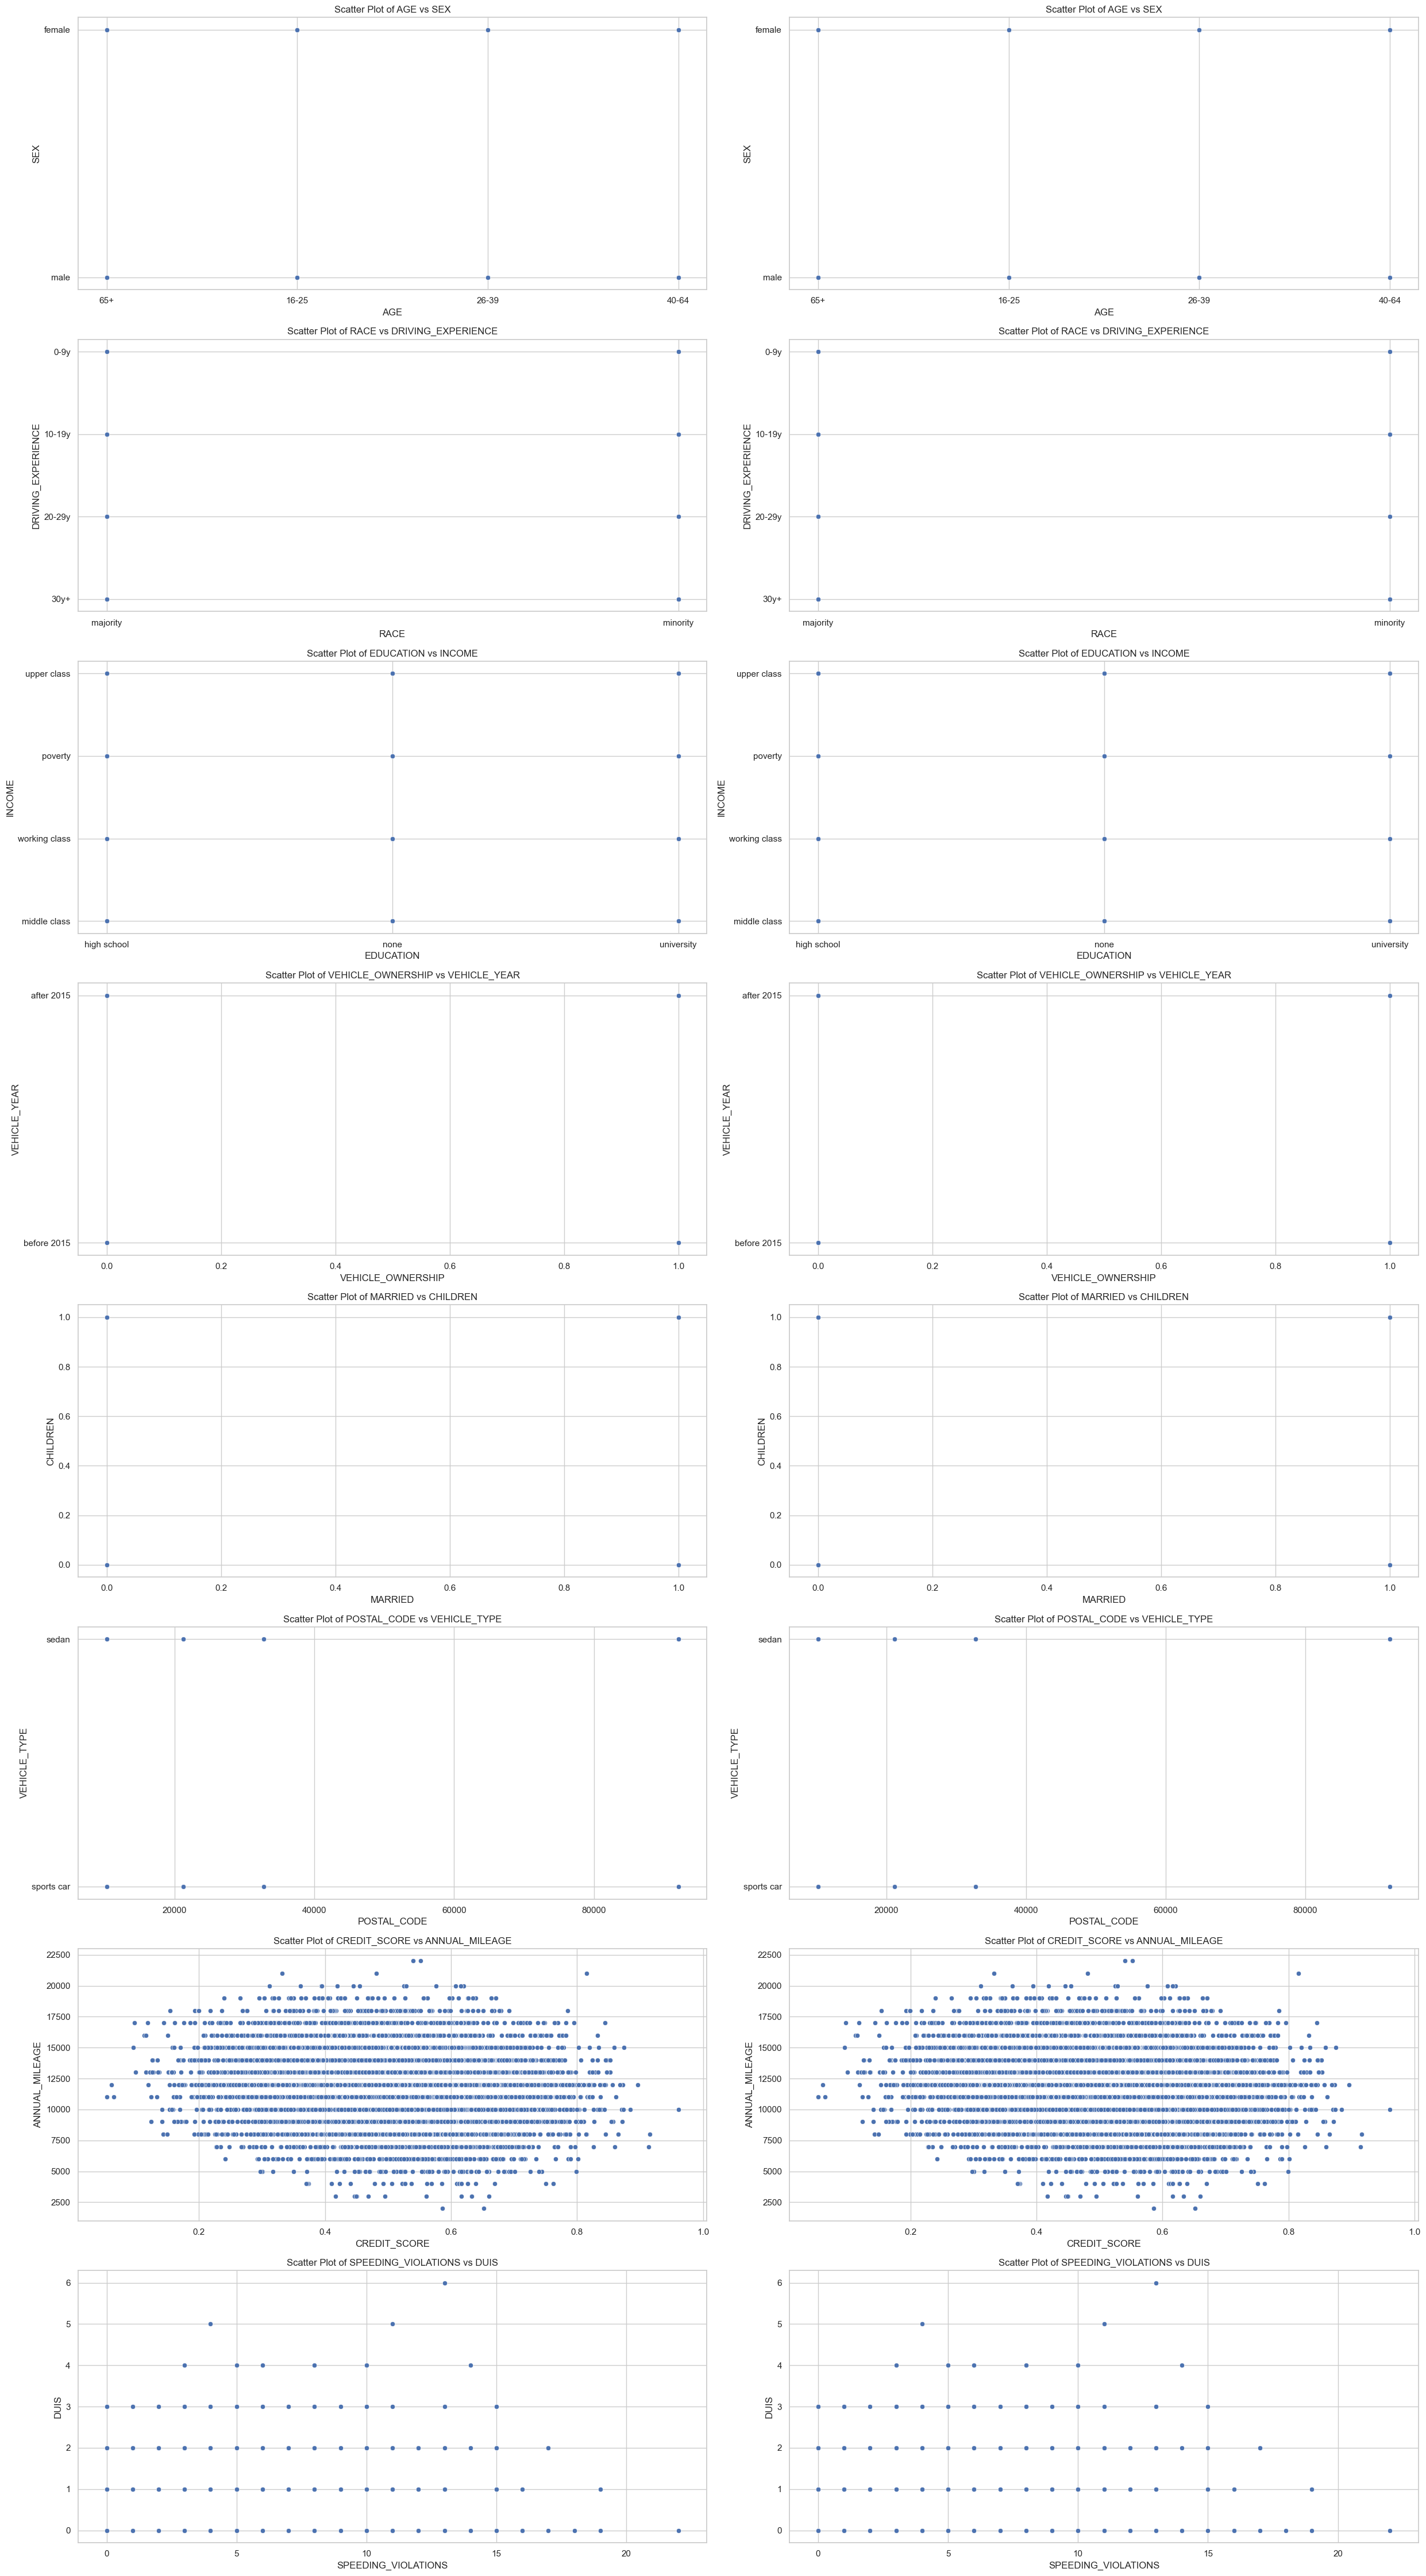

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử bạn đã đọc dữ liệu vào DataFrame df
# df = pd.read_csv('your_data.csv')

fig, ax = plt.subplots(8, 2, figsize=(25, 45))

features = [
    ['AGE', 'SEX'],
    ['RACE', 'DRIVING_EXPERIENCE'],
    ['EDUCATION', 'INCOME'],
    ['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'],
    ['MARRIED', 'CHILDREN'],
    ['POSTAL_CODE', 'VEHICLE_TYPE'],
    ['CREDIT_SCORE', 'ANNUAL_MILEAGE'],
    ['SPEEDING_VIOLATIONS', 'DUIS'],
    ['PAST_ACCIDENTS', 'OUTCOME']
]

for i in range(8):
    for j in range(2):
        try:
            col_x = features[i][0]  # Thuộc tính x
            col_y = features[i][1]  # Thuộc tính y
            # Vẽ biểu đồ phân tán cho các thuộc tính
            sns.scatterplot(x=df[col_x], y=df[col_y], ax=ax[i, j])
            ax[i, j].set_title(f'Scatter Plot of {col_x} vs {col_y}')
        except IndexError:
            pass  # Nếu không có thuộc tính nào thì bỏ qua

plt.tight_layout()
plt.show()


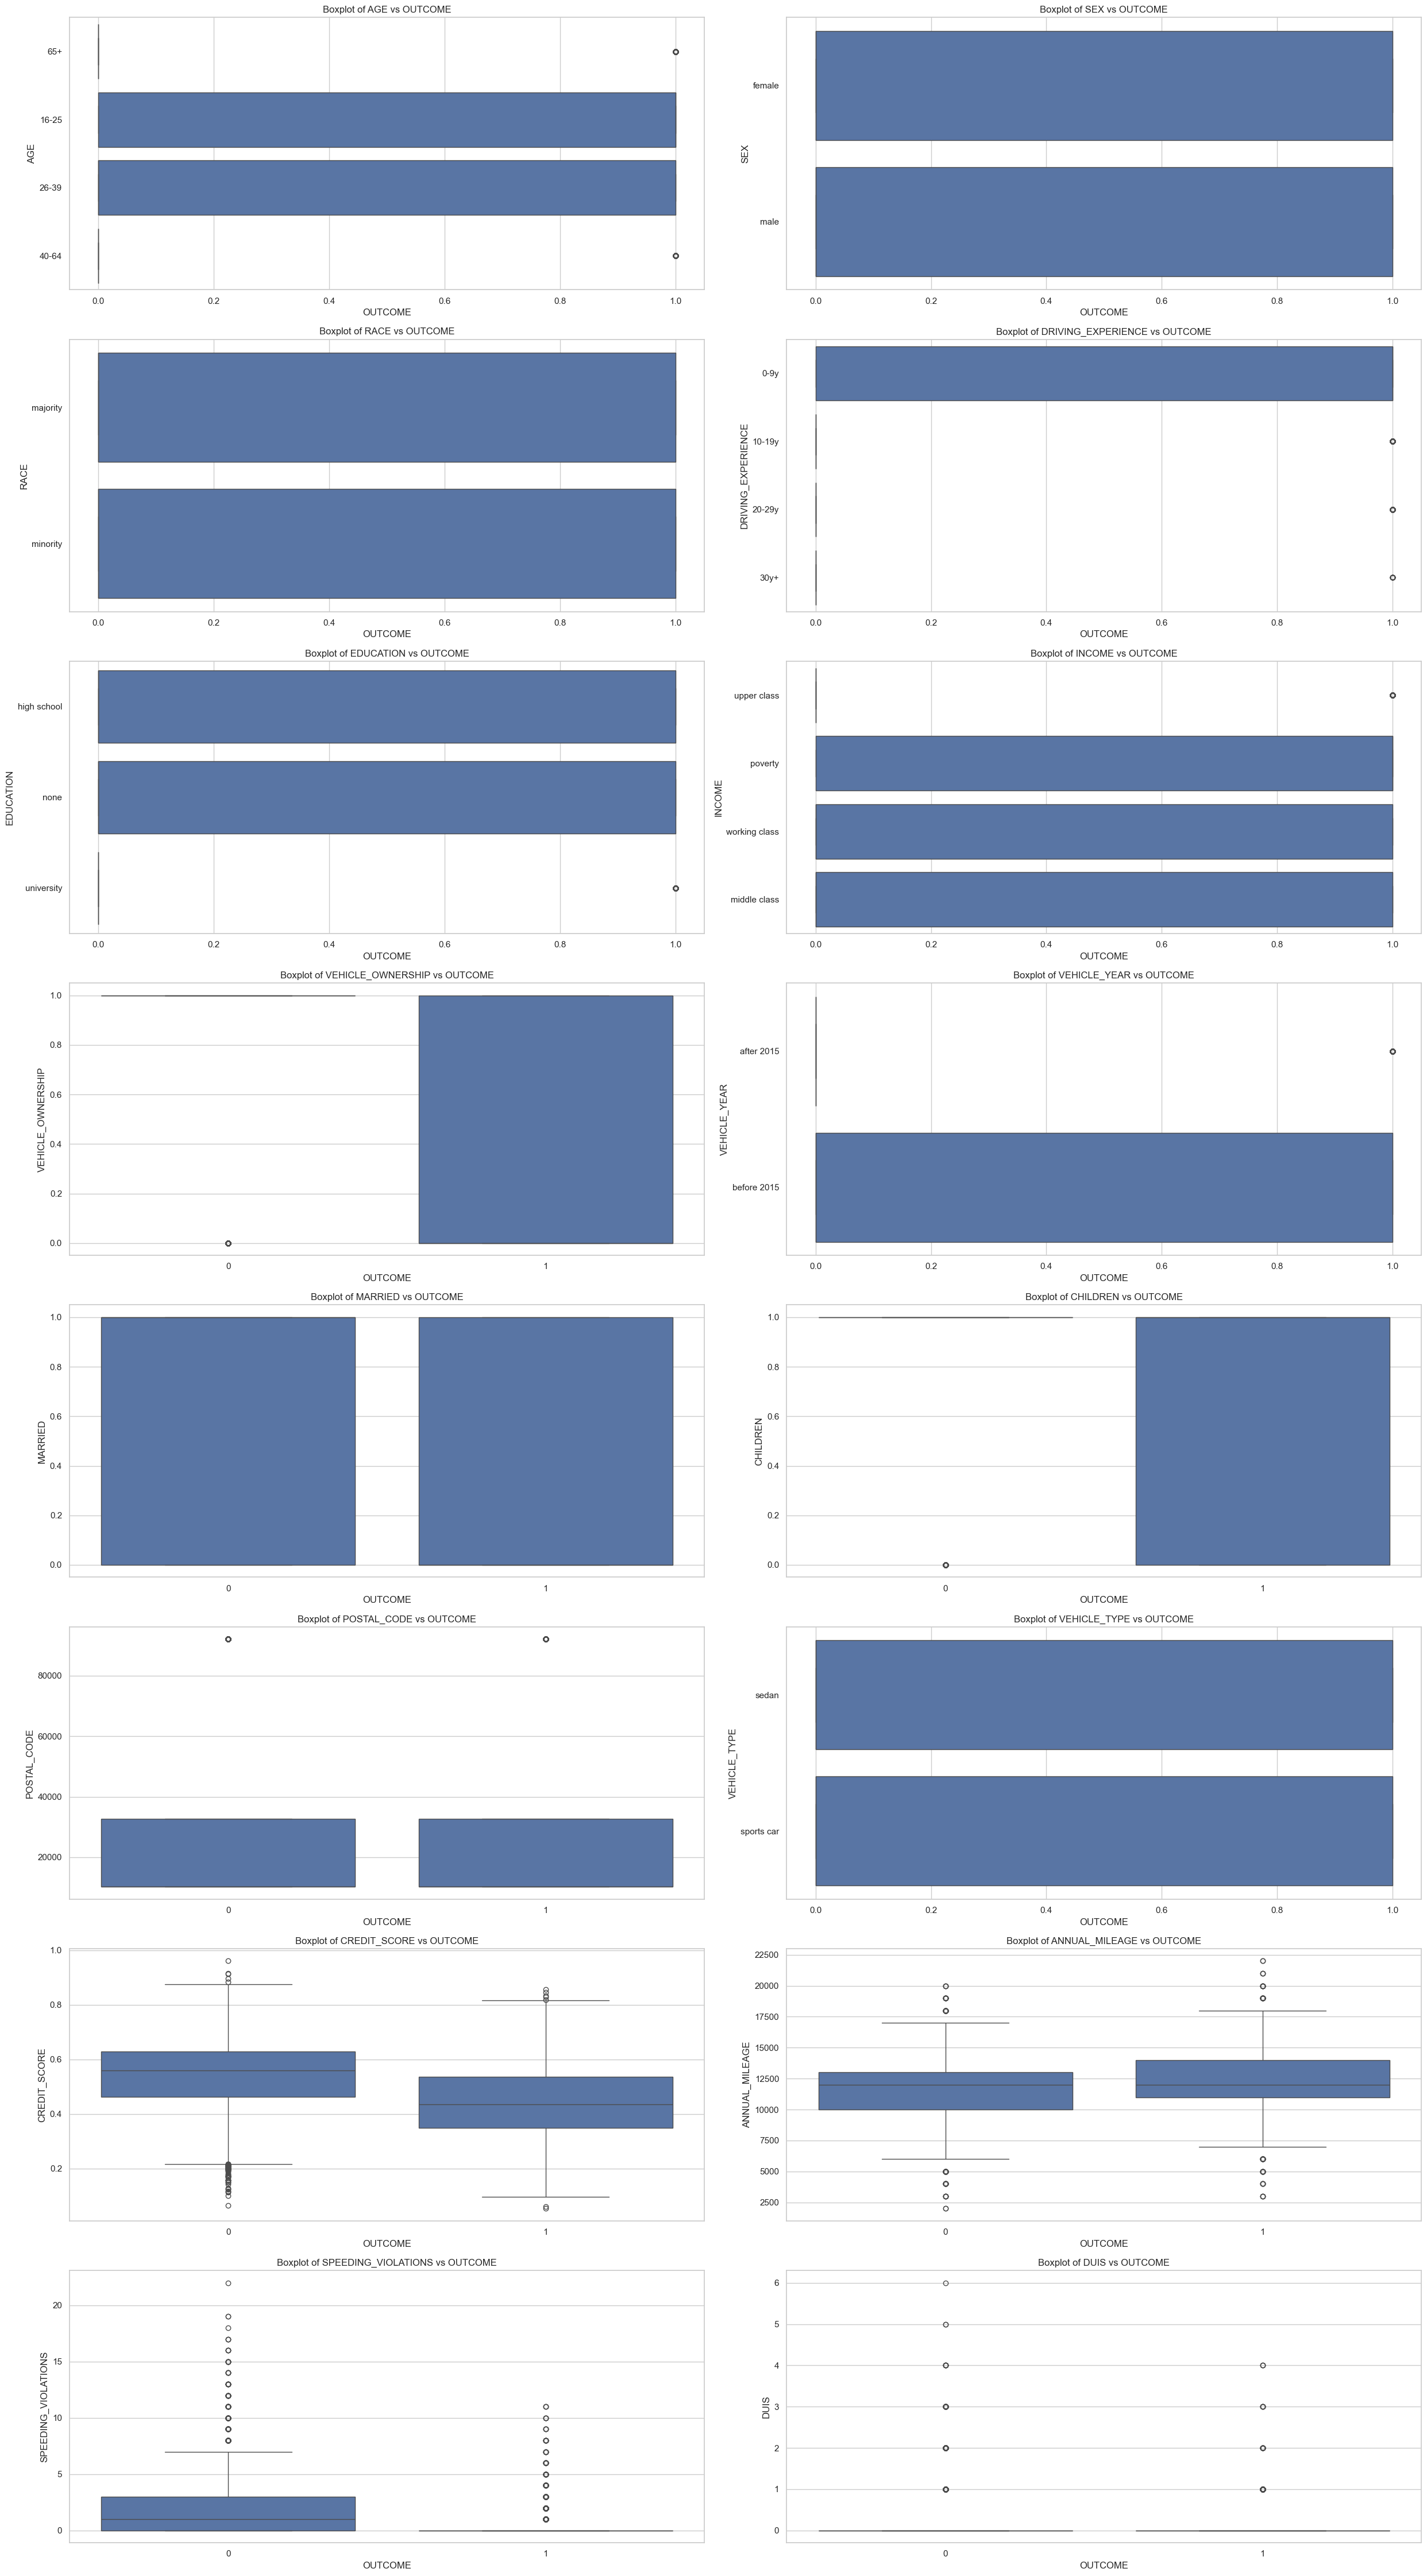

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử bạn đã đọc dữ liệu vào DataFrame df
# df = pd.read_csv('your_data.csv')

fig, ax = plt.subplots(8, 2, figsize=(25, 45))

features = [
    ['AGE', 'SEX'],
    ['RACE', 'DRIVING_EXPERIENCE'],
    ['EDUCATION', 'INCOME'],
    ['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR'],
    ['MARRIED', 'CHILDREN'],
    ['POSTAL_CODE', 'VEHICLE_TYPE'],
    ['CREDIT_SCORE','ANNUAL_MILEAGE'],
    ['SPEEDING_VIOLATIONS', 'DUIS'],
    ['PAST_ACCIDENTS', 'OUTCOME']
]

for i in range(8):
    for j in range(2):
        try:
            col = features[i][j]
            # Vẽ boxplot cho mỗi thuộc tính với cột OUTCOME
            sns.boxplot(x='OUTCOME', y=col, data=df, ax=ax[i, j])
            ax[i, j].set_title(f'Boxplot of {col} vs OUTCOME')
        except IndexError:
            pass  # Nếu không có thuộc tính nào thì bỏ qua

plt.tight_layout()
plt.show()


In phân bố dữ liệu

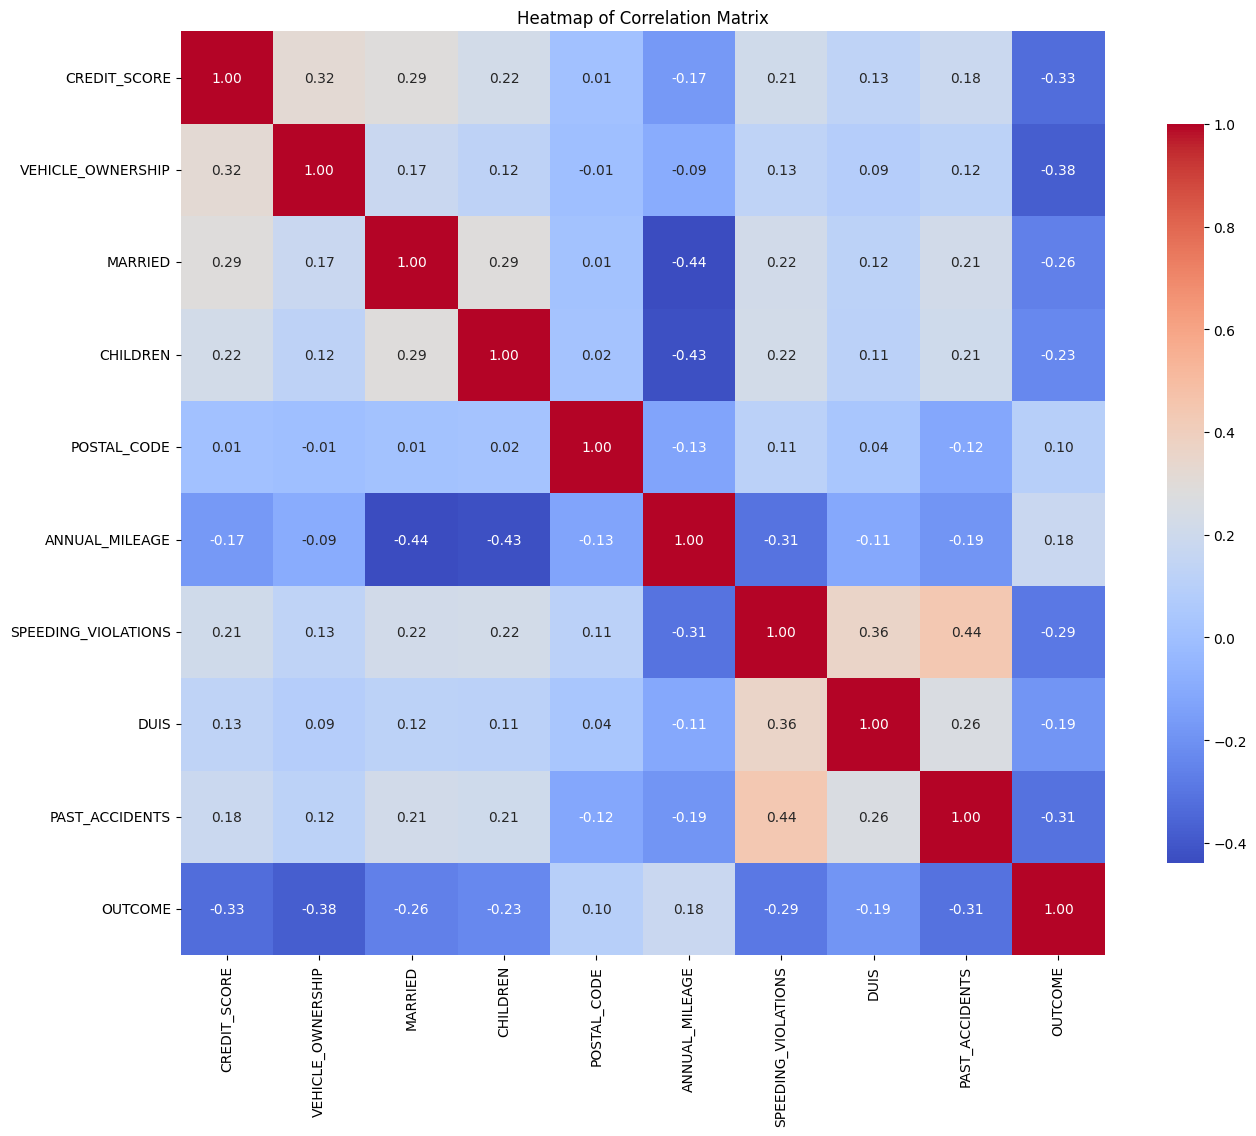

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến tập dữ liệu
url = 'F:\\NamTu\\HK1\\KhaiKhoangDuLieu\\Project_Nhom5_STT21\\Car_Insurance_DaXuLy.csv'

# Đọc dữ liệu
data = pd.read_csv(url)

# Chọn các biến số để tính toán ma trận tương quan
# Chỉ lấy các cột có kiểu dữ liệu số
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Tạo heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix')
plt.show()
